Descripción estadística general:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


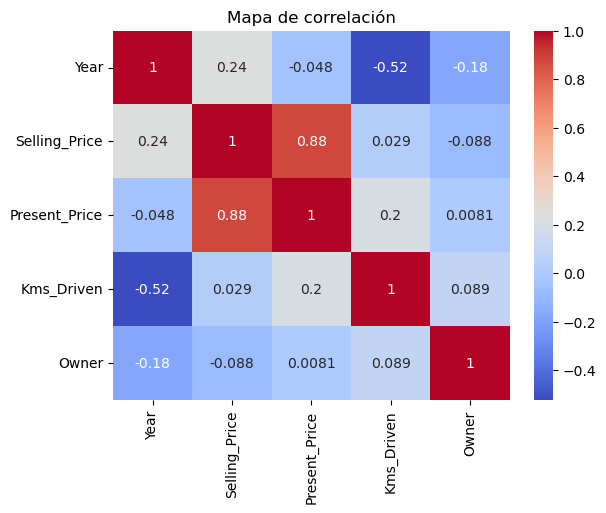

Características seleccionadas:
[1 4 5 6 7]
MAE (Regresión Lineal): 1.2162256821295867
Exactitud (Regresión Logística): 0.9180327868852459
MSE (Árbol de Decisión): 1.2710372723132968


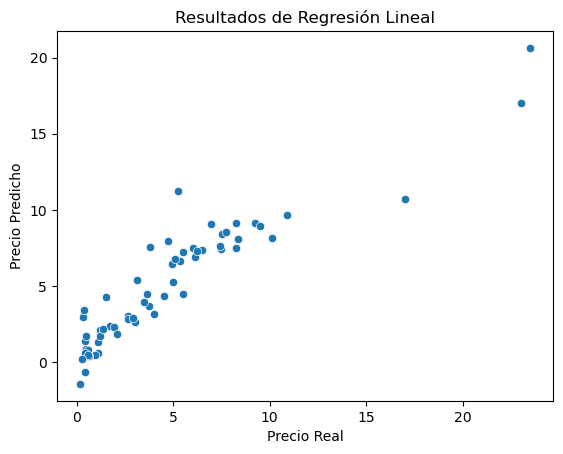

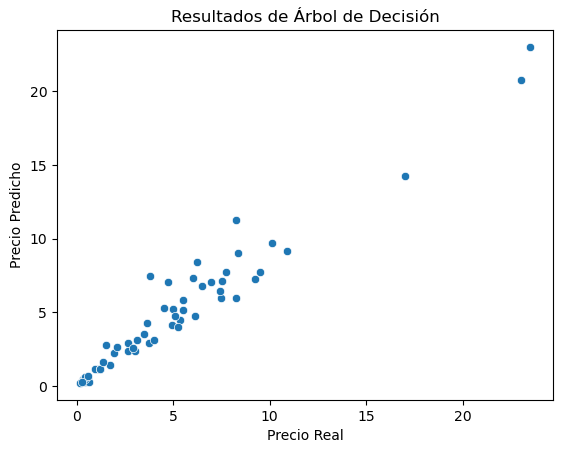

Análisis completado. Revisa las gráficas y métricas para más detalles.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, recall_score, f1_score, mean_squared_error

# Paso 1: Lectura del dataset
file_path = r"C:\Users\ruben\Desktop\Vehicle_dataset.csv\car_data.csv"
data = pd.read_csv(file_path)

# Paso 2: Análisis exploratorio de datos (EDA)

print("Descripción estadística general:")
print(data.describe())

# Filtrar solo columnas numéricas para evitar errores en la correlación
numeric_data = data.select_dtypes(include=['number'])

# Graficar la matriz de correlación
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()

# Paso 3: Preprocesamiento de datos
data = data.dropna()  # Eliminar valores faltantes
data = data.drop(columns=['Car_Name'])  # Eliminar columnas irrelevantes
data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)  # Variables categóricas

# Paso 4: Selección de características
X = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']

selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
print("Características seleccionadas:")
print(selector.get_support(indices=True))

# Paso 5: Dividir el conjunto de datos en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 6: Entrenar modelos y configurar hiperparámetros

# Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("MAE (Regresión Lineal):", mae_linear)

# Regresión Logística
threshold = y.median()
y_class = (y > threshold).astype(int)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_class, y_train_class)
y_pred_logistic = logistic_model.predict(X_test_class)
accuracy_logistic = accuracy_score(y_test_class, y_pred_logistic)
print("Exactitud (Regresión Logística):", accuracy_logistic)

# Árbol de Decisión
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("MSE (Árbol de Decisión):", mse_tree)

# Paso 7: Visualización de resultados
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.title('Resultados de Regresión Lineal')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()

sns.scatterplot(x=y_test, y=y_pred_tree)
plt.title('Resultados de Árbol de Decisión')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()

# Paso 8: Documentar e interpretar resultados
print("Análisis completado. Revisa las gráficas y métricas para más detalles.")
